In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DatasaurusDozen.tsv', encoding = "ISO-8859-1", sep='\t')

In [3]:
df.head()

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


In [4]:
dataset_names = list(df['dataset'].unique())

In [5]:
dataset_names

['dino',
 'away',
 'h_lines',
 'v_lines',
 'x_shape',
 'star',
 'high_lines',
 'dots',
 'circle',
 'bullseye',
 'slant_up',
 'slant_down',
 'wide_lines']

In [6]:
df_pivot = pd.pivot_table(df, values=['x', 'y'], index=['dataset'])

In [7]:
df_pivot.head(100)

,x,y
dataset,,
away,54.266100,47.834721
bullseye,54.268730,47.830823
circle,54.267320,47.837717
dino,54.263273,47.832253
dots,54.260303,47.839829
h_lines,54.261442,47.830252
high_lines,54.268805,47.835450
slant_down,54.267849,47.835896
slant_up,54.265882,47.831496


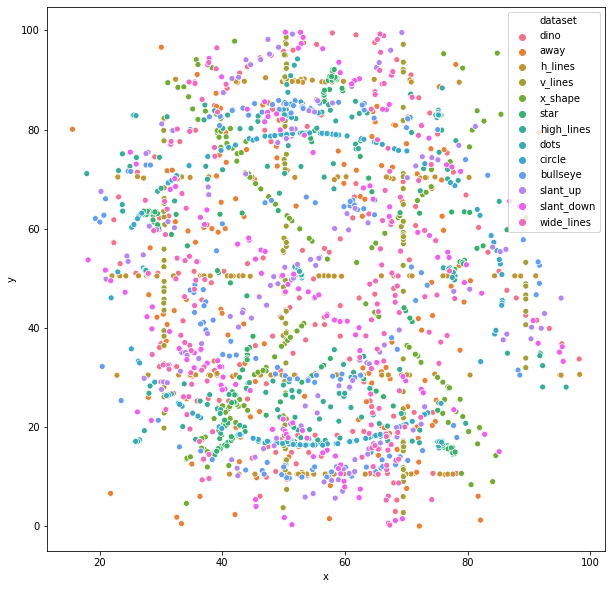

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.scatterplot(x="x", y="y", hue="dataset", data=df)

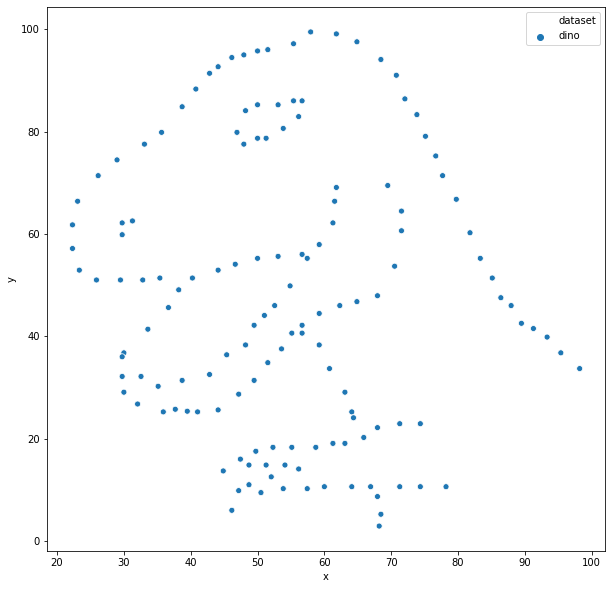

In [9]:
fig, ax = plt.subplots(figsize=(10,10))

df_filter = df[df['dataset'] == 'dino']

ax = sns.scatterplot(x="x", y="y", hue="dataset", data=df_filter)

In [10]:
df.groupby('dataset').describe()

x                                                         \
            count       mean        std        min        25%        50%   
dataset                                                                    
away        142.0  54.266100  16.769825  15.560750  39.724115  53.340296   
bullseye    142.0  54.268730  16.769239  19.288205  41.627968  53.842088   
circle      142.0  54.267320  16.760013  21.863581  43.379116  54.023213   
dino        142.0  54.263273  16.765142  22.307700  44.102600  53.333300   
dots        142.0  54.260303  16.767735  25.443526  50.359707  50.976768   
h_lines     142.0  54.261442  16.765898  22.003709  42.293828  53.069678   
high_lines  142.0  54.268805  16.766704  17.893499  41.535981  54.168689   
slant_down  142.0  54.267849  16.766759  18.109472  42.890931  53.135159   
slant_up    142.0  54.265882  16.768853  20.209778  42.810866  54.261345   
star        142.0  54.267341  16.768959  27.024603  41.034210  56.534732   
v_lines     142.0  54.269927  16.769959  30.449654  49.964506  50.362890   
wide_lines  142.0  54.266916  16.770000  27.439632  35.522449  64.550226   
x_shape     142.0  54.260150  16.769958  31.106867  40.091656  47.136458   

                                      y                                   \
                  75%        max  count       mean        std        min   
dataset                                                                    
away        69.146597  91.639961  142.0  47.834721  26.939743   0.015119   
bullseye    64.798900  91.735539  142.0  47.830823  26.935727   9.691547   
circle      64.972672  85.664761  142.0  47.837717  26.930036  16.326546   
dino        64.743600  98.205100  142.0  47.832253  26.935403   2.948700   
dots        75.197363  77.954435  142.0  47.839829  26.930192  15.771892   
h_lines     66.768274  98.288123  142.0  47.830252  26.939876  10.463915   
high_lines  63.952667  96.080519  142.0  47.835450  26.939998  14.913962   
slant_down  64.469989  95.593416  142.0  47.835896  26.936105   0.303872   
slant_up    64.488010  95.260528  142.0  47.831496  26.938608   5.645777   
star        68.711493  86.435897  142.0  47.839545  26.930275  14.365590   
v_lines     69.504068  89.504851  142.0  47.836988  26.937684   2.734760   
wide_lines  67.453672  77.915874  142.0  47.831602  26.937902   0.217006   
x_shape     71.856923  85.446186  142.0  47.839717  26.930002   4.577661   

                                                        
                  25%        50%        75%        max  
dataset                                                 
away        24.625892  47.535269  71.803148  97.475771  
bullseye    26.244735  47.382937  72.532852  85.876229  
circle      18.349610  51.025022  77.782382  85.578134  
dino        25.288450  46.025600  68.525675  99.487200  
dots        17.107141  51.299291  82.881589  94.249328  
h_lines     30.479911  50.473527  70.349471  90.458936  
high_lines  22.920843  32.499203  75.940022  87.152208  
slant_down  27.840858  46.401314  68.439430  99.644179  
slant_up    24.756248  45.292238  70.855844  99.579591  
star        20.374135  50.110554  63.548584  92.214989  
v_lines     22.752884  47.113616  65.845391  99.694680  
wide_lines  24.346941  46.279331  67.568127  99.283764  
x_shape     23.470809  39.876211  73.609634  97.837615

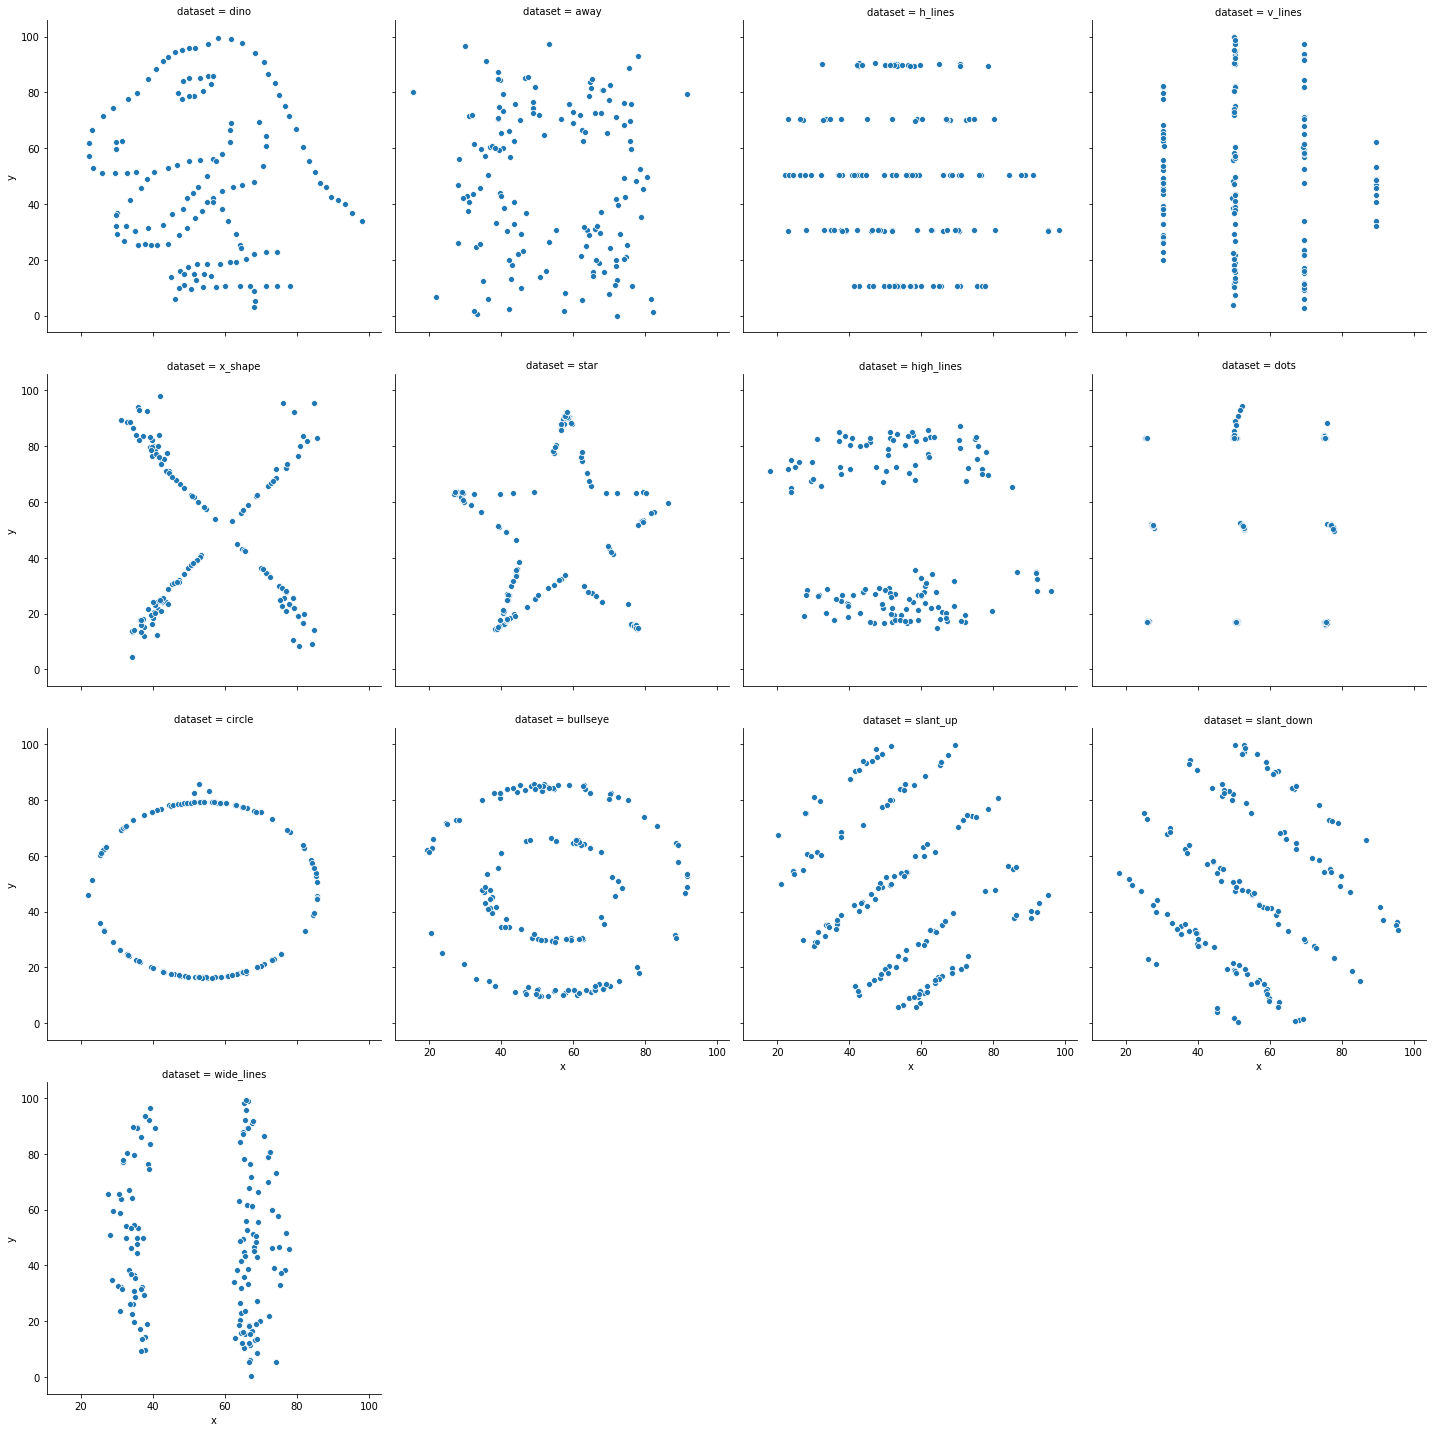

In [11]:
sns.relplot(x="x", y="y", col="dataset", kind="scatter", data=df, col_wrap=4)

In [12]:
import altair as alt

selectDropdown = alt.selection_single(
    name='Select',
    fields=['dataset'],
    init={'dataset': dataset_names[0]},
    bind=alt.binding_select(options=dataset_names)
)

alt.Chart(df).mark_circle().add_selection(
    selectDropdown
).encode(
    x='x',
    y='y',
    tooltip=['x:N','y:N'],
    opacity=alt.condition(selectDropdown, alt.value(0.95), alt.value(0.05))
)

alt.Chart(...)